<a href="https://colab.research.google.com/github/Amit-Rikhari/Deep_Learning_Repo/blob/main/Cat_vs_Dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data set loading

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#generator

train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

test_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

Model **Building**

In [12]:
#CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), padding = 'valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                      

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model Training

In [17]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 69s 102ms/step - loss: 0.7734 - accuracy: 0.6236 - val_loss: 0.6386 - val_accuracy: 0.6518
Epoch 2/10
625/625 [==============================] - 54s 87ms/step - loss: 0.5132 - accuracy: 0.7436 - val_loss: 0.5046 - val_accuracy: 0.7492
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.4251 - accuracy: 0.8027 - val_loss: 0.4845 - val_accuracy: 0.7732
Epoch 4/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3539 - accuracy: 0.8419 - val_loss: 0.4907 - val_accuracy: 0.7722
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2688 - accuracy: 0.8862 - val_loss: 0.4564 - val_accuracy: 0.8112
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1892 - accuracy: 0.9232 - val_loss: 0.5314 - val_accuracy: 0.7610
Epoch 7/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1170 - accuracy: 0.9556 - val_loss: 0.6355 - val_accuracy

Model Accuracy

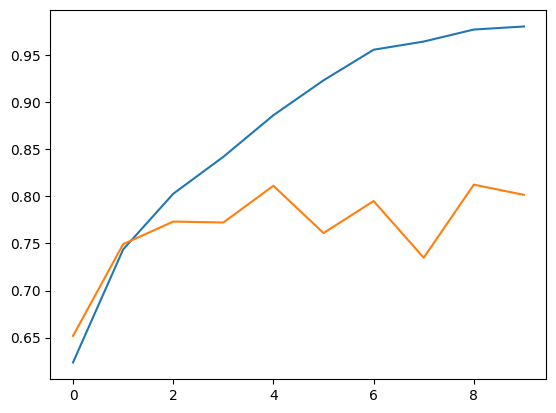

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Testing

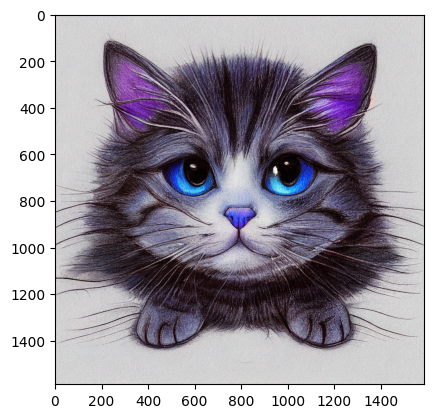

In [30]:
import cv2
test_img = cv2.imread('/content/il_1588xN.4359490203_otwt.webp')
plt.imshow(test_img)


In [31]:
test_img.shape

(1588, 1588, 3)

In [32]:
test_img= cv2.resize(test_img,(256,256))
test_input= test_img.reshape((1,256,256,3))

In [33]:
test_img.shape

(256, 256, 3)

Prediction

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

Thank you